mu1/sigma1/mu2/sigma2/mu3/sigma3:
[2.97825787 1.33135949 6.02208924 1.19594099 9.08989143 1.52581429]
Fehler:
[0.3160237  0.35474788 0.34387196 0.28668731 0.39722694 0.50417138]


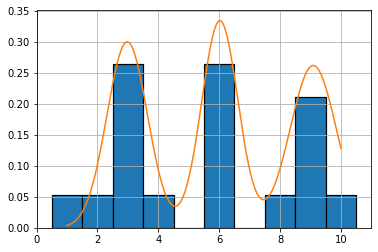

In [21]:
#Benotigte Madule(inkl. in Anaconda)
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random
from scipy.stats import norm

import sys

def gau(x,m,o):
    return (1/np.sqrt(2*np.pi*o**2))*np.exp(-(x-m)**2/(o**2)*2)

def func(B, x):
    [m1,o1,m2,o2,m3,o3]=B
    return gau(x,m1,o1)+gau(x,m2,o2)+gau(x,m3,o3)
    
def fit(x,y,x_err,y_err):
    #definerit die zu fittene Funktion,in B sind die Parameter und x ist die unabhängige
    model = Model(func)

    #Überprüft welche Fehler angegeben wurden
    if (np.isnan(x_err).any() and np.isnan(y_err).any()):
        data = RealData(x, y)
    elif np.isnan(x_err).any():
        data = RealData(x, y, sy=y_err)
    elif np.isnan(y_err).any():
        data = RealData(x, y, sx=x_err)
    else:
        data = RealData(x, y, sx=x_err, sy=y_err)
    
    #Führt den Fit aus, beta0 sind die Startwerte
    odr = ODR(data, model, beta0=[3., 1.,6., 1.,9., 1.])
    out = odr.run()
    #out.beta beinhaltet die Parameter
    #out.sd_beta beinhaltet die Fehler der Parameter
    return out

#Spannung
U=np.array([600,500])
U_fehler=1
U_err=np.full(len(U),U_fehler)

#Zeit:
t2=np.array([1,1])
t1=np.array([1,1])
t_fehler=0.1
t_err=np.full(len(t1),t_fehler)

#Strecke; x ist gemessen durchs Mikroskop; s ist umgerechnet in den Realen wert
x=np.array([1,1])
x_fehler=0.1
x_err=np.full(len(x),x_fehler)

#Position
z=1.875 #zoom
z_err=1.875*0.01
s=x/z*10**(-4)
s_err=np.sqrt((1/z*10**(-4)*x_err)**2+
              (x*10**(-4)*z_err/z**2)**2)

#Geschwindigkeit
v1=s/t1
v1_err=[]
v2=s/t2
v2_err=[]


Q=(v1+v2)*np.sqrt(v1)/U*2*10**(-10)
#Als BSP
Q=np.array([1,2,3,3,3,3,3,4,6,6,6,6,6,8,9,9,9,9,10]);

Q_err=[]
#Als BSP:
Q_err=np.linspace(1,5,len(Q))

#Anpassen für schönnes Histogramm
stepsize=1

#Histogramm erstellen
bins=np.arange(min(Q)-stepsize/2,max(Q)+stepsize/1.5,stepsize)
[n,binsh,ka]=plt.hist(Q,bins=bins,density=True,edgecolor='black', linewidth=1.2)


#Fit erstellen
xf=np.arange(min(Q),max(Q)+1,stepsize)
yf=n

out=fit(xf,yf,Q_err,np.nan)

#Fit-Funktionswerte Berechnen
x_p=np.linspace(min(Q),max(Q),1000)
y_p=func(out.beta,x_p)

#Plotten
f=plt.plot(x_p,y_p)
plt.grid()

print("mu1/sigma1/mu2/sigma2/mu3/sigma3:")
print(out.beta)
print("Fehler:")
print(out.sd_beta)